In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing data file
dataSet = pd.read_csv('Loan_Sheet_Session 3 (MLP).csv')

In [3]:
dataSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
count = dataSet.Loan_Status.value_counts()
print(count)

Y    422
N    192
Name: Loan_Status, dtype: int64


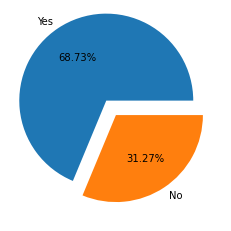

In [7]:
myexp = [0.2, 0]
plt.pie (count, labels = ("Yes","No") , explode = myexp, autopct = "%.2f%%")
plt.show()

In [8]:
dataSet.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:

dataSet.dropna(axis = 0, inplace = True)
dataSet.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Male = 0, Female = 1
dataSet['Gender'] = dataSet['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
# Yes = 1, No = 0
dataSet['Married'] = dataSet['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
# Graduate = 1, Not Graduate = 0
dataSet['Education'] = dataSet['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
# Yes: 1 # No : 0 # unknown:2
dataSet['Self_Employed'] = dataSet['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
dataSet['Property_Area'] = dataSet['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})
dataSet['Loan_Status'] = dataSet['Loan_Status'].replace({'Y':1, 'N':0})
dataSet['Dependents'] = dataSet['Dependents'].replace({'3+':3})
dataSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [11]:
x = dataSet.iloc[:,1:-1]
y = dataSet.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)
x.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0


In [12]:
Learn = KNeighborsClassifier(n_neighbors=10)
Learn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
print("Accuracy: ", Learn.score(x_test, y_test)*100)

Accuracy:  70.83333333333334


In [14]:
Gender= input("Input Gender 1 for Male 0 for Female: ")
Married= input("If marrried Input 1 for Yes and 0 for No: ")
Dependents= input("Depedents present ? \n Input 1, 2 or 3+ in case of more than 3: ")
Education= input ("Education level \n Input 0 for Not Graduate 0 and 1 for Graduate: ")
SelfEmp= input("Self employed ? \nInput 1 for Yes 0 for No: ")
AppInc= input("Enter Applicant income: ")
CoApInc=input("Enter co Applicant income: ")
LoanAmt=input("Enter loan amount: ")
LoanAmtTerm=input("Enter loan amount term: ")
Credithis=input("Enter credit history: ")
PropArea=input("Enter property area 1 for urban and 0 for rural: ")
x_actual_values=[Gender,Married,Dependents,Education,SelfEmp,AppInc,CoApInc,LoanAmt,LoanAmtTerm,Credithis,PropArea]
print (x_actual_values)

Input Gender 1 for Male 0 for Female: 1
If marrried Input 1 for Yes and 0 for No: 0
Depedents present ? 
 Input 1, 2 or 3+ in case of more than 3: 1
Education level 
 Input 0 for Not Graduate 0 and 1 for Graduate: 1
Self employed ? 
Input 1 for Yes 0 for No: 0
Enter Applicant income: 50000
Enter co Applicant income: 2000
Enter loan amount: 50
Enter loan amount term: 2
Enter credit history: 1
Enter property area 1 for urban and 0 for rural: 1
['1', '0', '1', '1', '0', '50000', '2000', '50', '2', '1', '1']


In [15]:
x_actual_values=np.array(x_actual_values).astype('int16')
x_actual_values=x_actual_values.reshape(1,11)
x_actual_values=pd.DataFrame(x_actual_values)
x_actual_values.columns=(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
y_actual_pred=Learn.predict(x_actual_values)
print('Should the person be given a loan ? \n1 for yes 0 for no. \n As per KNN the answer is =',y_actual_pred)

Should the person be given a loan ? 
1 for yes 0 for no. 
 As per KNN the answer is = [1]


In [16]:
import os
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
feature_cols = ['Loan_Status', 'Education', 'Self_Employed']
x = dataSet[feature_cols] 
y = dataSet.Loan_Status

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
classifier = dt(criterion = 'entropy', random_state = 0)
#classifier = dt(criterion = 'entropy', random_state = 0, max_depth=4)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#Y_pred, Y_test

In [21]:
print("Predicted Values : ",Y_pred[1:50])

Predicted Values :  [0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1]


In [22]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


[Text(334.8, 285.39, 'X[0] <= -0.451\nentropy = 0.874\nsamples = 360\nvalue = [106, 254]'),
 Text(167.4, 95.13, 'entropy = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(502.20000000000005, 95.13, 'entropy = 0.0\nsamples = 254\nvalue = [0, 254]')]

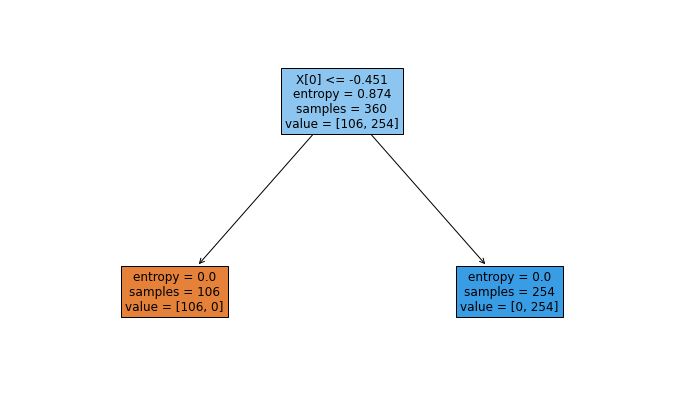

In [23]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)

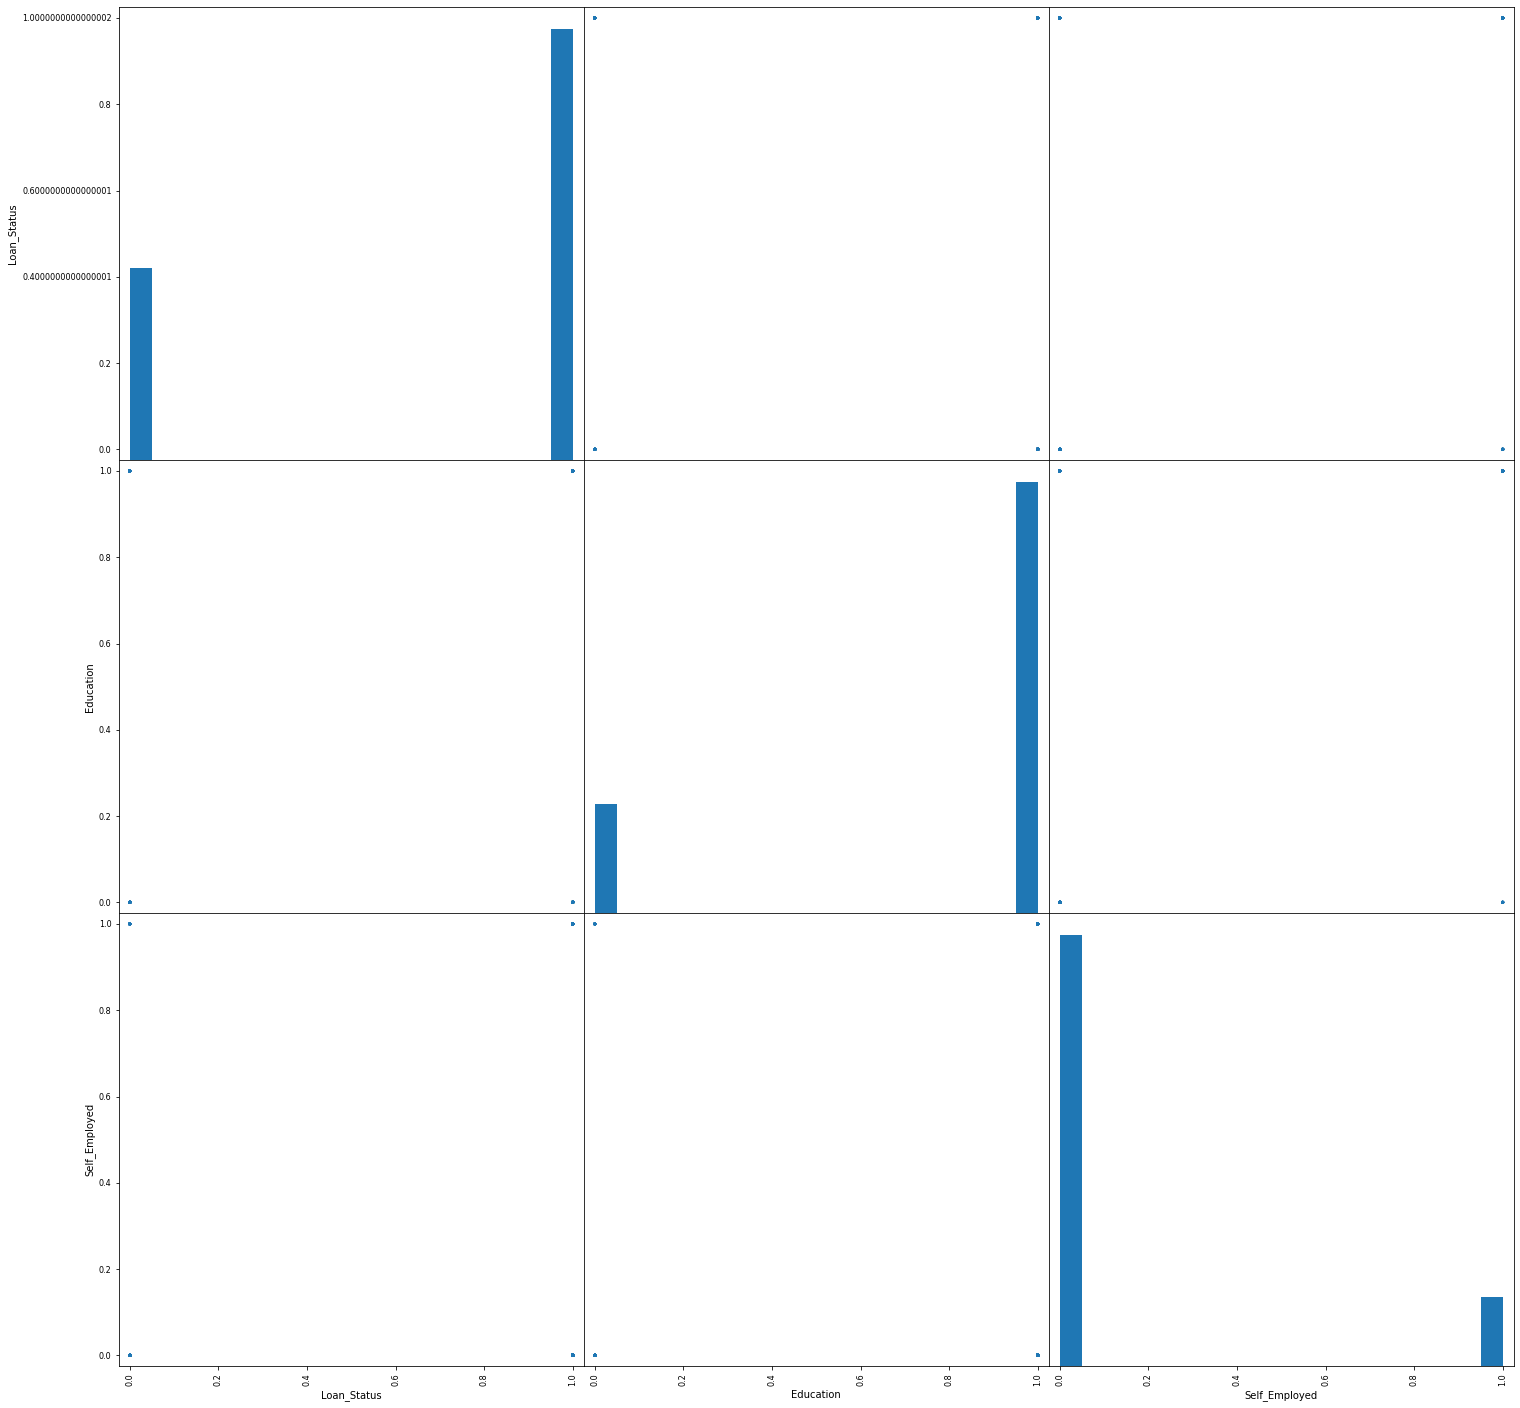

In [24]:
X_dataframe = x

grr = pd.plotting.scatter_matrix(X_dataframe, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

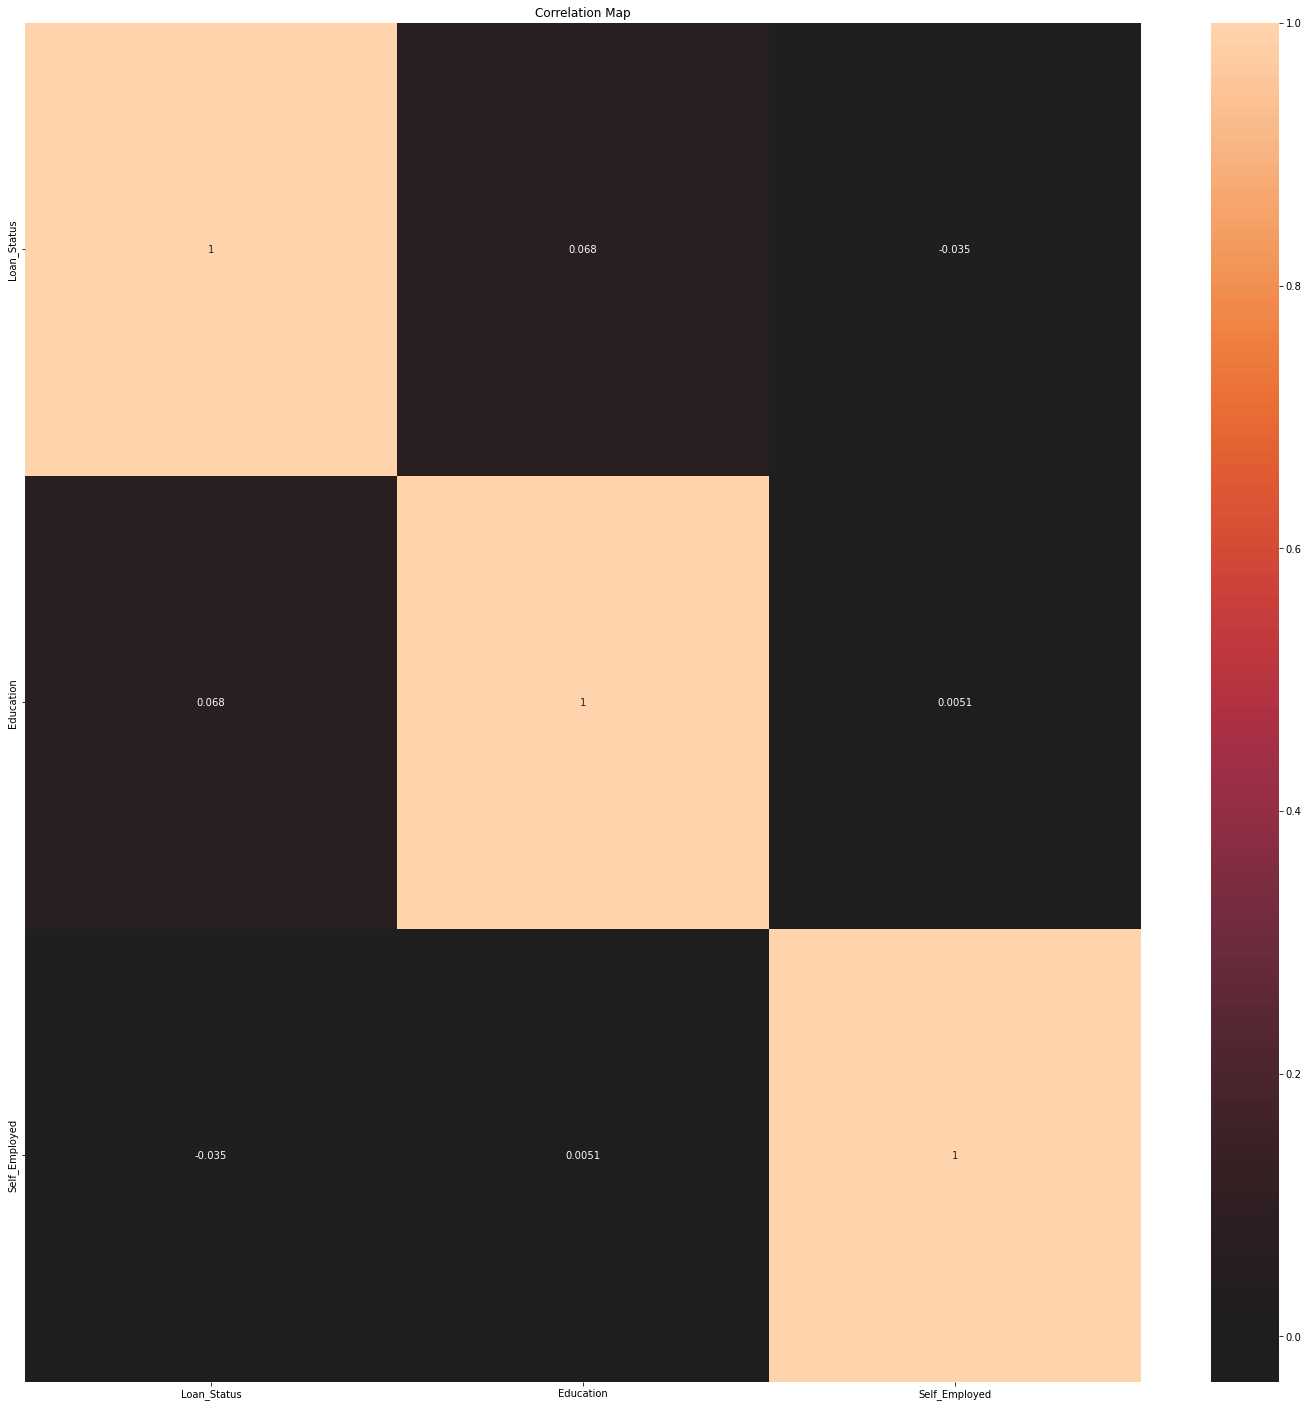

In [25]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(x.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [26]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


In [27]:
#The accuracy score for Decision model is better than KNN model